# Aircraft Saftey Analysis


**Author:** Noah Meakins
***


![commercial banner 2.jpeg](<attachment:commercial banner 2.jpeg>)
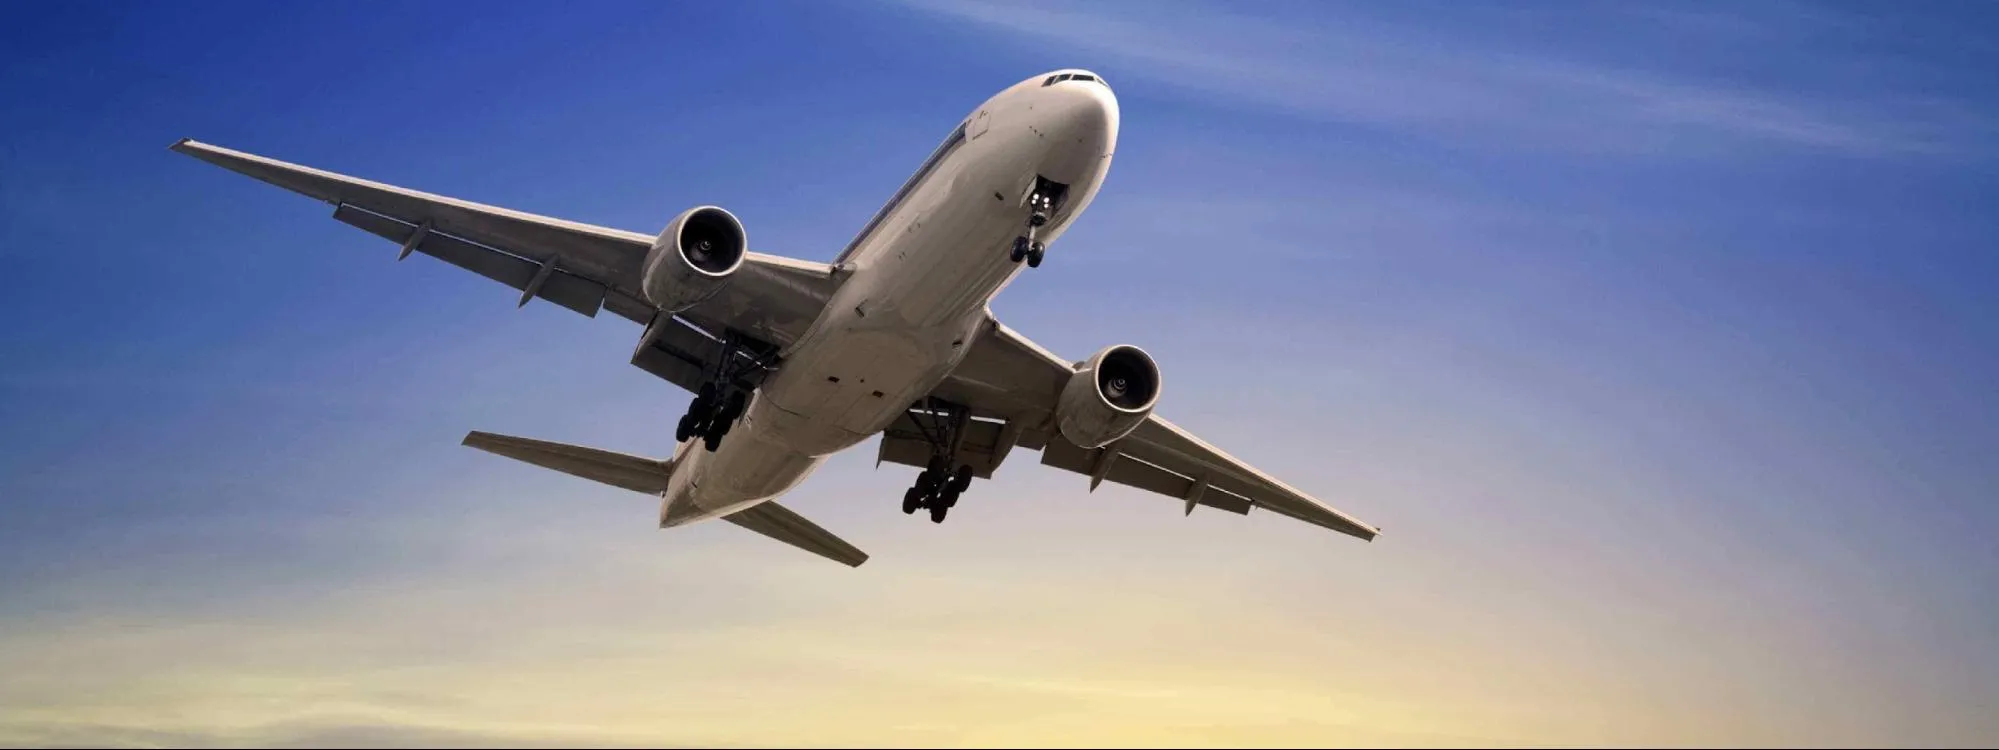

# Overview

This in-depth analysis is intended to guide our company's foray into the commercial and private aviation sectors. By identifying historical safety risks and the most common causes of serious accidents, we aim to implement best practices and safety standards that surpass industry norms. This proactive approach to safety and risk analysis will be foundational in establishing our company as a responsible and trustworthy player in the aviation industry.

### Business Problem

My company is expanding into new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises but do not know anything about the potential risks of aircraft. I have been tasked with determining which aircraft are the lowest risk for the company to start this new business endeavor. With the data I will gather from the attached dataset, I will provide insights that will assist the head of the new aviation division, which can then use those insights to help decide which aircraft to purchase. Some specific data I will be analyzing at a deeper level are Country, Location, Make, Model, Number of Engines, Engine Type, Weather Conditions, Injury Severity, and Aircraft Damage. Some questions I will be asking myself during this analysis are:

1. Out of the columns that might have missing data, what methods should I implement for columns that I will need in my analysis? 
2. What Charts will be beneficial in presenting a visual representation of my analysis? 
3. How will I determine the safest and most profitable aircraft to invest in? 

These questions are important from a business perspective because if the data in my analysis is skewed due to missing data or data that doesn’t pertain to this analysis, it can negatively influence business decisions.  
***

![Airplane 1.jpeg](<attachment:Airplane 1.jpeg>) ![private plane 1.jpeg](<attachment:private plane 1.jpeg>)

***
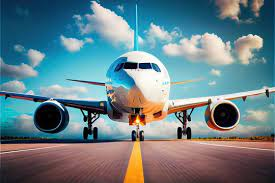
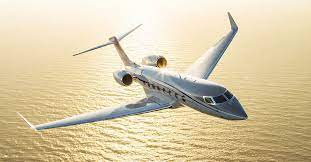

### Data Understanding

- The data for this project was sourced from the National Transportation Safety Board and includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters. It's relevant to my analysis as we aim to understand various aircraft models and the levels of safety associated with them. 

- The dataset consists of individual aircraft accidents, each record detailing the accident. It includes data from incidents in the United States and international waters. Key variables include Country, Location, Make, Model, Number of Engines, Engine Type, Weather Conditions, Injury Severity, and Aircraft Damage. 

- For this analysis, in line with our company's focus on safety and risk assessment, the primary target variable is 'total fatal injuries'. Analyzing this variable will help us assess the severity of accidents and understand the safety challenges inherent in the aviation industry, especially pertinent to commercial and private flight operations.

***

![NTSB 1.jpg](<attachment:NTSB 1.jpg>)
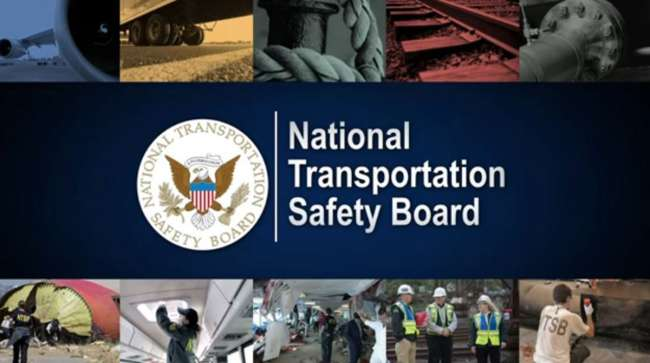

***
# Initial Investigation of the Original Dataset
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('max_columns', 200) # I wanted to see all the columns in the dataset when printing the dataframe
pd.set_option('max_rows', 20000) # I wanted to see as many rows as I needed to at any given time in the dataset when printing the dataframe
%matplotlib inline

***
Above you can see I have added some pandas options to the cell above. "pd.set_option" along with the "max_columns" and "max_rows" alows me to see more of the data when printing a pandas dataframe. This can be helpful when you want to see more than the default amount that pandas will print. It is not needed but can make things a bit easier when printing dataframes. 
*** 

In [2]:
df = pd.read_csv('/Users/unit66/Downloads/AviationData.csv', encoding='latin-1', low_memory=False)

In [3]:
df.shape

(88889, 31)

***
This is a relatively large dataset. From the research completed on this dataset before importing it into my notebook, I noticed that there are some aircraft that most likely will not benefit my companies business needs for my first steps into commercial and private enterprises. For example, Hot Air Balloons, Gliders, and Hobbyist Aircraft are not potential aircraft for the business problem at hand. With that being said, in preparation for my analysis of this dataset, I will be removing any aircraft that will not benefit my analysis. 
*** 

In [4]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

***
### Columns I Will Remove
As shown above, you can see that there are many columns that will not be needed for my analysis. Later in my prep for analysis, you will see what columns I will end up keeping, and ones that I believe will not be needed for this analysis. This will minimize clutter of the dataset as a whole and will make my work more efficient in determining potential aircraft for this business endeavor. For example, the following columns will not be needed for my anlysis, and I will be removing them later in this notbook: 
- Event.Id
- Accident.Number
- Latitude 
- Longitude 
- Airport.Code
- Airport.Name
- Registration.Number
- FAR.Description
- Schedule
- Air.carrier
- Report.Status
- Publication.Date

There are multiple reason why I feel these columns arent needed, but the main reason is these columns seem to be used for record keeping tasks within the NTSB to keep their data organized in a way they can easily refrence specific data. Also, columns like "Airport.Name" will not be beneficial to my analysis. 
*** 

In [5]:
df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

***
### Data Types and What Will Need To Be Changed

When looking into the data types of each coliumn in this dataset, I notice that the "Event.Date" is not a pandas datetime data type. This will be an easy fix and you will see this change later in my notebook. As far as the rest of the columns in this dataset, are the correct data types they are meant to be. The only that may raise concern and could possibly need to be changed is the "Airport.Code" column, two reason why I am not too woried about this is due to the fact that the "Airport.Code" might have letters along with numbers depending on what the "Airport.Code" consists of. The second reason I am not worreid is because we are not going to be utilizing this column in my analysis. Above you can see that it is in my list of columns to be removed.  
*** 

In [6]:
df.describe()

Number.of.Engines  Total.Fatal.Injuries  Total.Serious.Injuries  \
count       82805.000000          77488.000000            76379.000000   
mean            1.146585              0.647855                0.279881   
std             0.446510              5.485960                1.544084   
min             0.000000              0.000000                0.000000   
25%             1.000000              0.000000                0.000000   
50%             1.000000              0.000000                0.000000   
75%             1.000000              0.000000                0.000000   
max             8.000000            349.000000              161.000000   

       Total.Minor.Injuries  Total.Uninjured  
count          76956.000000     82977.000000  
mean               0.357061         5.325440  
std                2.235625        27.913634  
min                0.000000         0.000000  
25%                0.000000         0.000000  
50%                0.000000         1.000000  
75%                0.000000         2.000000  
max              380.000000       699.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

***
When using the ".info()" function, I first notice that a majority of my columns contains various amounts of missing data. This will have to be managed before I move on to my analysis and modeling of this data. I will notice a change in the amounts after removing columns but there still will be columns I will have to clean up prior to my analysis. There are a few methods that I could use to accomplish this, but I plan on using imputation methods in order to keep as much data as I can. With this being said, I will have to make sure to choose what methods I use wisely in order to keep my data set from becoming skewed or biased in various ways. 
***

***
### Aviation Data 
The Aviation dataset consists of records from 1962 to 2023, and contains a large amount of information on Event Date, Location, Aircraft Damage, Injury Severity, and Total Fatal Injuries. I will start by removing columns that wont benefit the goal of the analysis and formatting the columns I decide to keep. This will consist of making each column name normalized, cleaning missing data, and combining columns where I can. The primary goal of the next step in this analysis is making sure the data I do decide to use is clean and will provide us the accurate data we need to make a successful business decision. 
***

In [8]:
df.head()

Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude   Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN         NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN         NaN          NaN   
2    Saltville, VA  United States  36.922223  -81.878056          NaN   
3       EUREKA, CA  United States        NaN         NaN          NaN   
4       Canton, OH  United States        NaN         NaN          NaN   

  Airport.Name Injury.Severity Aircraft.damage Aircraft.Category  \
0          NaN        Fatal(2)       Destroyed               NaN   
1          NaN        Fatal(4)       Destroyed               NaN   
2          NaN        Fatal(3)       Destroyed               NaN   
3          NaN        Fatal(2)       Destroyed               NaN   
4          NaN        Fatal(1)       Destroyed               NaN   

  Registration.Number      Make     Model Amateur.Built  Number.of.Engines  \
0              NC6404   Stinson     108-3            No                1.0   
1              N5069P     Piper  PA24-180            No                1.0   
2              N5142R    Cessna      172M            No                1.0   
3              N1168J  Rockwell       112            No                1.0   
4               N15NY    Cessna       501            No                NaN   

     Engine.Type FAR.Description Schedule Purpose.of.flight Air.carrier  \
0  Reciprocating             NaN      NaN          Personal         NaN   
1  Reciprocating             NaN      NaN          Personal         NaN   
2  Reciprocating             NaN      NaN          Personal         NaN   
3  Reciprocating             NaN      NaN          Personal         NaN   
4            NaN             NaN      NaN          Personal         NaN   

   Total.Fatal.Injuries  Total.Serious.Injuries  Total.Minor.Injuries  \
0                   2.0                     0.0                   0.0   
1                   4.0                     0.0                   0.0   
2                   3.0                     NaN                   NaN   
3                   2.0                     0.0                   0.0   
4                   1.0                     2.0                   NaN   

   Total.Uninjured Weather.Condition Broad.phase.of.flight   Report.Status  \
0              0.0               UNK                Cruise  Probable Cause   
1              0.0               UNK               Unknown  Probable Cause   
2              NaN               IMC                Cruise  Probable Cause   
3              0.0               IMC                Cruise  Probable Cause   
4              0.0               VMC              Approach  Probable Cause   

  Publication.Date  
0              NaN  
1       19-09-1996  
2       26-02-2007  
3       12-09-2000  
4       16-04-1980

## Data Preparation

In [9]:
# Subsetting the data to only include the columns I want to work with and making a copy of the dataframe
df = df[[#'Event.Id', 
       'Investigation.Type', 
       # 'Accident.Number', 
       'Event.Date',
       'Location', 'Country', 
       # 'Latitude', 'Longitude', 'Airport.Code',
       # 'Airport.Name', 
       'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 
       # 'Registration.Number', 
       'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 
       # 'FAR.Description',
       # 'Schedule', 
       'Purpose.of.flight', 
       # 'Air.carrier', 
       'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 
       # 'Report.Status',
       #'Publication.Date'
       ]].copy()

***
When dropping the columns listed earlier in my notebook, I chose to subset this data instead of dropping the columns with the "df.drop" method. This way I am able to visually see what I plan to keep and remove in one cell. This is personal prefrence and is a method I have learned through research and over time. 

Removing the columns you see (as said earlier in my notebook) will make my process of analyzing this data more efficient. 
***

In [ ]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

In [11]:
df.dtypes

Investigation.Type                object
Event.Date                datetime64[ns]
Location                          object
Country                           object
Injury.Severity                   object
Aircraft.damage                   object
Aircraft.Category                 object
Make                              object
Model                             object
Amateur.Built                     object
Number.of.Engines                float64
Engine.Type                       object
Purpose.of.flight                 object
Total.Fatal.Injuries             float64
Total.Serious.Injuries           float64
Total.Minor.Injuries             float64
Total.Uninjured                  float64
Weather.Condition                 object
Broad.phase.of.flight             object
dtype: object

In [12]:
# Creating a function that takes the column names and returns a normalized version of it
def normalize_column_name(name):
    return name.strip().lower().replace(' ', '_').replace('.','_').replace('-','_')

In [13]:
# List comprehension to apply the function to all the column names
df.columns = [normalize_column_name(col) for col in df.columns]

***
Shown above, I have created a function to normalize the columns in a way that will be easier to read when moving on to my analysis, as well as more ledgable when modeling this data. Sometimes this may not be needed but in this case I feel that it is logical with the inconsistentcies in the column names. 
***

In [14]:
# Verifying that the column names have been normalized
df.head()

investigation_type event_date         location        country  \
0           Accident 1948-10-24  MOOSE CREEK, ID  United States   
1           Accident 1962-07-19   BRIDGEPORT, CA  United States   
2           Accident 1974-08-30    Saltville, VA  United States   
3           Accident 1977-06-19       EUREKA, CA  United States   
4           Accident 1979-08-02       Canton, OH  United States   

  injury_severity aircraft_damage aircraft_category      make     model  \
0        Fatal(2)       Destroyed               NaN   Stinson     108-3   
1        Fatal(4)       Destroyed               NaN     Piper  PA24-180   
2        Fatal(3)       Destroyed               NaN    Cessna      172M   
3        Fatal(2)       Destroyed               NaN  Rockwell       112   
4        Fatal(1)       Destroyed               NaN    Cessna       501   

  amateur_built  number_of_engines    engine_type purpose_of_flight  \
0            No                1.0  Reciprocating          Personal   
1            No                1.0  Reciprocating          Personal   
2            No                1.0  Reciprocating          Personal   
3            No                1.0  Reciprocating          Personal   
4            No                NaN            NaN          Personal   

   total_fatal_injuries  total_serious_injuries  total_minor_injuries  \
0                   2.0                     0.0                   0.0   
1                   4.0                     0.0                   0.0   
2                   3.0                     NaN                   NaN   
3                   2.0                     0.0                   0.0   
4                   1.0                     2.0                   NaN   

   total_uninjured weather_condition broad_phase_of_flight  
0              0.0               UNK                Cruise  
1              0.0               UNK               Unknown  
2              NaN               IMC                Cruise  
3              0.0               IMC                Cruise  
4              0.0               VMC              Approach

In [15]:
df.isna().sum()

investigation_type            0
event_date                    0
location                     52
country                     226
injury_severity            1000
aircraft_damage            3194
aircraft_category         56602
make                         63
model                        92
amateur_built               102
number_of_engines          6084
engine_type                7077
purpose_of_flight          6192
total_fatal_injuries      11401
total_serious_injuries    12510
total_minor_injuries      11933
total_uninjured            5912
weather_condition          4492
broad_phase_of_flight     27165
dtype: int64

***
Shown above, I can see there are various amounts of missing or "NaN" data in our kept columns. Some amounts signicantly larger than others. With this being said, for the columns with very little NaN data, I have decided to completely drop the rows entirely, as this will not effect our dataset substantially. For the columns with significantly more NaN data, I will have to decide what to replace the NaN data with. I will also have to consider the fact that these number will drop while cleaning up various columns in the cleaning and preparation process. 
***

In [16]:
df.loc[df.duplicated()]

investigation_type event_date          location         country  \
1371            Accident 1982-05-28    EVANSVILLE, IN   United States   
3082            Accident 1982-10-18    GULF OF MEXICO  GULF OF MEXICO   
4761            Accident 1983-05-22    BRIDGEPORT, CA   United States   
7941            Accident 1984-04-13        DELAND, FL   United States   
8661            Accident 1984-06-18      PORTLAND, AR   United States   
13532           Accident 1985-11-30     SAN PEDRO, CA   United States   
19820           Incident 1988-03-10    GREENSBORO, NC   United States   
21077           Incident 1988-08-05       ATLANTA, GA   United States   
22453           Incident 1989-03-01       HOUSTON, TX   United States   
24878           Accident 1990-02-09     TETERBORO, NJ   United States   
26868           Accident 1990-10-20          KENT, OH   United States   
27496           Accident 1991-03-02        MARANA, AZ   United States   
27811           Accident 1991-04-19    SANTA ROSA, NM   United States   
28706           Accident 1991-07-31        SILICA, KS   United States   
30247           Accident 1992-04-23       BRANSON, MO   United States   
31502           Accident 1992-09-21       ORLANDO, FL   United States   
34847           Accident 1994-04-10    OKEECHOBEE, FL   United States   
35076           Accident 1994-05-19      STOCKTON, CA   United States   
38187           Accident 1995-08-27  FORT COLLINS, CO   United States   
39138           Accident 1996-02-24      Havana, Cuba            Cuba   
43728           Accident 1998-04-19     KISSIMMEE, FL   United States   
45738           Accident 1999-03-10  BATTLE CREEK, MI   United States   
48463           Accident 2000-05-27       BUNNELL, FL   United States   
51386           Accident 2001-08-27       Hopland, CA   United States   
57380           Accident 2004-08-28      Prescott, AZ   United States   
58650           Incident 2005-05-17        Denver, CO   United States   
62369           Accident 2007-04-21      VAN HORN, TX   United States   
63043           Accident 2007-07-27       Phoenix, AZ   United States   
63296           Accident 2007-09-02   FARMINGDALE, NY   United States   
66669           Accident 2009-07-02   Grand Forks, ND   United States   
71016           Accident 2011-10-30   Grangeville, ID   United States   
77987           Incident 2016-03-20       Cusco, Peru            Peru   
87645           Accident 2022-04-06    Waterville, ME   United States   
88387           Accident 2022-08-20      Bealeton, VA   United States   
88528           Incident 2022-09-14          Mumbai,            India   

      injury_severity aircraft_damage aircraft_category  \
1371        Non-Fatal     Substantial          Airplane   
3082         Fatal(3)       Destroyed        Helicopter   
4761         Fatal(1)     Substantial               NaN   
7941        Non-Fatal     Substantial               NaN   
8661        Non-Fatal     Substantial               NaN   
13532        Fatal(1)       Destroyed               NaN   
19820        Incident             NaN               NaN   
21077        Incident           Minor               NaN   
22453        Incident             NaN               NaN   
24878       Non-Fatal     Substantial               NaN   
26868       Non-Fatal     Substantial               NaN   
27496       Non-Fatal     Substantial               NaN   
27811       Non-Fatal     Substantial               NaN   
28706        Fatal(2)       Destroyed               NaN   
30247       Non-Fatal     Substantial               NaN   
31502       Non-Fatal     Substantial               NaN   
34847       Non-Fatal     Substantial               NaN   
35076       Non-Fatal     Substantial               NaN   
38187       Non-Fatal     Substantial               NaN   
39138        Fatal(4)       Destroyed          Airplane   
43728        Fatal(2)       Destroyed               NaN   
45738       Non-Fatal     Substantial               NaN   
48463        Fatal(2

In [17]:
# Dropping duplicated rows from the dataframe
df = df.drop_duplicates()

# Resetting the index of the dataframe
df.reset_index(drop=True, inplace=True)

***
Shown above, I am first checking the entire dataset for any rows that also have a duplicate row. This will ensure our anlysis will not have any minor bias towards a specific value. The rows you see above are only the second instance of each duplicate row, so although this may seem like its not a large amount, it still needs to be removed before moving onto the analysis.
***

In [19]:
# Filling missing values for numerical columns with 0
numerical_columns = ['total_fatal_injuries', 'total_serious_injuries', 
                     'total_minor_injuries', 'total_uninjured']
df[numerical_columns] = df[numerical_columns].fillna(0)

# Filling missing values for categorical columns with 'Unknown' or the most frequent value
categorical_columns = ['engine_type', 'purpose_of_flight', 'weather_condition', 
                       'broad_phase_of_flight']
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

# Checking the updated dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88854 entries, 0 to 88853
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   investigation_type      88854 non-null  object        
 1   event_date              88854 non-null  datetime64[ns]
 2   location                88802 non-null  object        
 3   country                 88628 non-null  object        
 4   injury_severity         87856 non-null  object        
 5   aircraft_damage         85663 non-null  object        
 6   aircraft_category       32277 non-null  object        
 7   make                    88791 non-null  object        
 8   model                   88762 non-null  object        
 9   amateur_built           88752 non-null  object        
 10  number_of_engines       82774 non-null  float64       
 11  engine_type             88854 non-null  object        
 12  purpose_of_flight       88854 non-null  object

***
Shown above, I have decided to impute the four listed numerical column's NaN values with "0". I believe this will not skew the dataset in any sort of way. We can consider the NaN data as "0", so filling all NaN data in the listed numberical columns is the logical choice. 

For the listed categorical columns, I have decided to impute the NaN values with "Unknown" mainly for the same reasoning as the numerical columns. I beleive this will not skew thr data in any sort of way, and is the logical choice for a accurate analysis. 
***

***
Shown below: 
In alignment with the business's core objectives, it is important to acknowledge that aircraft constructed by amateur builders may not embody the comprehensive safety measures that are standard among certified aircraft produced by established manufacturers. These manufacturers are obligated to adhere to strict safety regulations, ensuring a higher level of safety assurance. With that being said, excluding amateur-built aircraft and events before the year 2000 from our analysis represents a logical decision in our pursuit of identifying the most reliable aircraft.
***

In [20]:
# Filtering out amateur-built aircraft
df = df[df['amateur_built'] == 'No']

# Focusing on recent data from 2000 onwards
df = df[df['event_date'] >= '2000-01-01']

df.head()


investigation_type event_date         location        country  \
47653           Accident 2000-01-01    HOMESTEAD, FL  United States   
47654           Accident 2000-01-01    MONTEAGLE, TN  United States   
47655           Accident 2000-01-02  VICTORVILLE, CA  United States   
47656           Accident 2000-01-02    DOS PALOS, CA  United States   
47657           Accident 2000-01-02      CORNING, AR  United States   

      injury_severity aircraft_damage aircraft_category      make       model  \
47653       Non-Fatal     Substantial               NaN    Cessna         550   
47654        Fatal(2)       Destroyed               NaN  Bellanca   BL-17-30A   
47655       Non-Fatal     Substantial               NaN    Cessna        172G   
47656       Non-Fatal     Substantial               NaN    Cessna        172A   
47657       Non-Fatal     Substantial               NaN     Piper  PA-46-310P   

      amateur_built  number_of_engines    engine_type purpose_of_flight  \
47653            No                2.0      Turbo Fan       Positioning   
47654            No                1.0  Reciprocating          Personal   
47655            No                1.0  Reciprocating          Personal   
47656            No                1.0  Reciprocating     Instructional   
47657            No                1.0     Turbo Prop          Personal   

       total_fatal_injuries  total_serious_injuries  total_minor_injuries  \
47653                   0.0                     0.0                   0.0   
47654                   2.0                     0.0                   0.0   
47655                   0.0                     0.0                   0.0   
47656                   0.0                     0.0                   1.0   
47657                   0.0                     0.0                   0.0   

       total_uninjured weather_condition broad_phase_of_flight  
47653              3.0               VMC                Cruise  
47654              0.0               IMC                Cruise  
47655              2.0               VMC                Cruise  
47656              0.0               VMC                Cruise  
47657              5.0               VMC                Cruise

In [21]:
# Checking the shape of the dataset after filtering and cleaning the data
df.shape

(36429, 19)

***
The dataset has significantly dropped in size, this is nothing to be concerned about as this was expected to happen with the prep and cleaning we have done up to this point. My main concern is filtering and gathering accurate and benficial data that will help me in my analysis of the remaining data. 
***

In [22]:
df.isna().sum()

investigation_type            0
event_date                    0
location                     12
country                      16
injury_severity             997
aircraft_damage            2039
aircraft_category         11325
make                         45
model                        64
amateur_built                 0
number_of_engines          4634
engine_type                   0
purpose_of_flight             0
total_fatal_injuries          0
total_serious_injuries        0
total_minor_injuries          0
total_uninjured               0
weather_condition             0
broad_phase_of_flight         0
dtype: int64

***
I have managed to clean up this dataset a bit, but I will need to continue cleaning the remaining columns before moving on to the analysis of this dataset. Next, I plan to handle the columns with minimal NaN data. As said before, I have decided to completely remove the respective row with NaN data in the following columns: 
- location
- country
- make
- model
- amateur_built
***

In [24]:
# List of columns to check for missing data
columns_to_check = ['location', 'country', 'make', 'model', 'amateur_built'].copy()

df = df.dropna(subset=columns_to_check)

df.reset_index(drop=True, inplace=True)

In [26]:
df.isna().sum()

investigation_type            0
event_date                    0
location                      0
country                       0
injury_severity             976
aircraft_damage            2012
aircraft_category         11251
make                          0
model                         0
amateur_built                 0
number_of_engines          4571
engine_type                   0
purpose_of_flight             0
total_fatal_injuries          0
total_serious_injuries        0
total_minor_injuries          0
total_uninjured               0
weather_condition             0
broad_phase_of_flight         0
dtype: int64

***
Now that I have handeled the columns with minimal NaN data, I will now move onto handling the remaining NaN data in the following columns:
- injury_severity
- aircraft_damage
- aircraft_category
- number_of_engines

Due to the nature of the remaining columns that have NaN data, I believe that imputing this NaN data with "Unknown" values will be the most logical option, and will not skew this data or create a bias towards any certain value. I will confirm this is the best option before applying to each column. If any other methods are used, I will note such changes in my notebook. 
***

In [27]:
# Replacing all NaN values with 'Unknown' for aircraft_damage
df['aircraft_damage'] = df['aircraft_damage'].fillna('Unknown')

In [28]:
# Looking into the rows that have a value of 0.0 in the 'number_of_engines' column
df[df['number_of_engines'] == 0.0].head(25)

investigation_type event_date         location        country  \
2062           Accident 2001-01-28    WURTSBORO, NY  United States   
2352           Accident 2001-04-08       PEORIA, AZ  United States   
2382           Accident 2001-04-14     WILLIAMS, CA  United States   
2496           Accident 2001-05-05     ADELANTO, CA  United States   
2533           Accident 2001-05-12  NEW MILFORD, CT  United States   

     injury_severity aircraft_damage aircraft_category           make  \
2062        Fatal(1)     Substantial               NaN  Schempp-hirth   
2352       Non-Fatal     Substantial               NaN      Schweizer   
2382        Fatal(1)     Substantial               NaN     Schleicher   
2496       Non-Fatal     Substantial               NaN      Schweizer   
2533       Non-Fatal     Substantial               NaN      Schweizer   

          model amateur_built  number_of_engines engine_type  \
2062  Discus CS            No                0.0     Unknown   
2352      2-33A            No                0.0     Unknown   
2382     ASW-20            No                0.0     Unknown   
2496   SGS 1-34            No                0.0     Unknown   
2533  SGS 1-26E            No                0.0     Unknown   

     purpose_of_flight  total_fatal_injuries  total_serious_injuries  \
2062          Personal                   1.0                     0.0   
2352          Business                   0.0                     0.0   
2382          Personal                   1.0                     0.0   
2496     Instructional                   0.0                     1.0   
2533     Instructional                   0.0                     0.0   

      total_minor_injuries  total_uninjured weather_condition  \
2062                   0.0              0.0               VMC   
2352                   1.0              1.0               VMC   
2382                   0.0              0.0               VMC   
2496                   0.0              0.0               VMC   
2533                   1.0              0.0               VMC   

     broad_phase_of_flight  
2062              Approach  
2352               Takeoff  
2382               Takeoff  
2496              Approach  
2533              Approach

In [29]:
# Filtering out 'number_of_engines' that have a value of 0.0
df = df[df['number_of_engines'] != 0.0]

df.reset_index(drop=True, inplace=True)

***
Shown above, after deeper inspection of the "number_of_engines" column and any rows with a vlaue of zero in the "number_of_engines" column, I notice that all of the aircraft with 0.0 engines are mainly hobbyist aircraft (Hot Air Balloons, Gliders, etc.) and will not be needed for my analysis. I believe they are not logical choices for commercial and private enterprises. 

In the cell below, I have also decided to do the same for any aircraft that have a value of "None" in the "engine_type" column. This will ensure I dont have any aircraft that do not pertain to the business problem at hand.
***

In [30]:
df = df[df['engine_type'] != 'None']

df.reset_index(drop=True, inplace=True)

In [32]:
# Changing NaN in 'number_of_engines' to 'Unknown' only where 'engine_type' is 'Unknown'
df.loc[(df['engine_type'] == 'Unknown') & (df['number_of_engines'].isna()), 'number_of_engines'] = 'Unknown'

In [33]:
df.isna().sum()

investigation_type            0
event_date                    0
location                      0
country                       0
injury_severity             976
aircraft_damage               0
aircraft_category         11130
make                          0
model                         0
amateur_built                 0
number_of_engines           611
engine_type                   0
purpose_of_flight             0
total_fatal_injuries          0
total_serious_injuries        0
total_minor_injuries          0
total_uninjured               0
weather_condition             0
broad_phase_of_flight         0
dtype: int64

In [34]:
df['aircraft_category'].value_counts()

Airplane             21160
Helicopter            2985
Glider                 146
Weight-Shift           139
Powered Parachute       83
Balloon                 71
Gyrocraft               31
Ultralight              18
Unknown                 11
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
Name: aircraft_category, dtype: int64

***
Shown below, I filter the dataset to only output Airplanes in the aircraft category. There are many instances of recorded accidents with various aircraft that won’t be logical choices. For example, Hot Air Balloons, Gliders, and Helicopters. Although Helicopters could be potential candidates, it has been stated that the company is only looking for airplanes to purchase for this business endeavor. 
***

In [35]:
df = df[df['aircraft_category'] == 'Airplane']

df.reset_index(drop=True, inplace=True)


In [37]:
df['engine_type'].value_counts()

Reciprocating      14904
Unknown             3974
Turbo Prop          1225
Turbo Fan            900
Turbo Jet            128
Geared Turbofan       12
Turbo Shaft           11
Electric               5
UNK                    1
Name: engine_type, dtype: int64

***
Shown below, I have chose to further filter the dataset to only output Modern Aircraft that utilize the most up-to-date and common engine systems. This includes:
- 'Turbo Fan'
- 'Turbo Jet'
- 'Geared Turbofan'
- 'Turbo Shaft

After doing some research into modern engine types used in commercial and private aircraft, the listed engine types were the results of my research. 
***

In [38]:
desired_engine_types = ['Turbo Fan', 'Turbo Jet', 'Geared Turbofan', 'Turbo Shaft']  
filtered_df = df[df['engine_type'].isin(desired_engine_types)].copy()

df = filtered_df


In [40]:
# Combining country and location columns into one column

df = df.copy()

df['combined_location'] = df['location'] + ', ' + df['country']

df.head()

investigation_type event_date            location        country  \
5            Accident 2000-02-16  RANCHO CORDOVA, CA  United States   
7            Accident 2000-03-05         BURBANK, CA  United States   
10           Accident 2000-04-02  GUAYAQUIL, ECUADOR        Ecuador   
11           Accident 2000-04-05        MARIANNA, FL  United States   
14           Incident 2000-04-30          DENVER, CO  United States   

   injury_severity aircraft_damage aircraft_category               make  \
5         Fatal(3)       Destroyed          Airplane            Douglas   
7        Non-Fatal       Destroyed          Airplane             Boeing   
10       Non-Fatal     Substantial          Airplane             Boeing   
11        Fatal(3)       Destroyed          Airplane            Learjet   
14        Incident         Unknown          Airplane  British Aerospace   

          model amateur_built number_of_engines engine_type purpose_of_flight  \
5      DC-8-71F            No                 4   Turbo Fan           Unknown   
7       737-300            No                 2   Turbo Fan           Unknown   
10     747-200F            No               NaN   Turbo Fan           Unknown   
11          35A            No                 2   Turbo Fan     Instructional   
14  BAE 146-200            No                 4   Turbo Fan           Unknown   

    total_fatal_injuries  total_serious_injuries  total_minor_injuries  \
5                    3.0                     0.0                   0.0   
7                    0.0                     2.0                  42.0   
10                   0.0                     0.0                   0.0   
11                   3.0                     0.0                   0.0   
14                   0.0                     0.0                   0.0   

    total_uninjured weather_condition broad_phase_of_flight  \
5               0.0               VMC               Takeoff   
7              98.0               VMC               Landing   
10              3.0           Unknown               Unknown   
11              0.0               VMC              Approach   
14             20.0               IMC                Cruise   

                    combined_location  
5   RANCHO CORDOVA, CA, United States  
7          BURBANK, CA, United States  
10        GUAYAQUIL, ECUADOR, Ecuador  
11        MARIANNA, FL, United States  
14          DENVER, CO, United States

***
Shown above, due to the listed columns not containing any NaN data after cleaning, I have decided to combine the "location" and "country" columns to make refrencing location and country much more efficient. This will  benefit me if I decide to end up using any location data in my analysis. 

Below it will can be noted that I have done the same for the "make" and "model" columns for the same purpose. 

***

In [42]:
# Combining 'make' and 'model' columns into one column
df['make_model'] = df['make'] + ' ' + df['model']

df.head()

aircraft_category aircraft_damage amateur_built broad_phase_of_flight  \
5           Airplane       Destroyed            No               Takeoff   
7           Airplane       Destroyed            No               Landing   
10          Airplane     Substantial            No               Unknown   
11          Airplane       Destroyed            No              Approach   
14          Airplane         Unknown            No                Cruise   

                    combined_location        country engine_type event_date  \
5   RANCHO CORDOVA, CA, United States  United States   Turbo Fan 2000-02-16   
7          BURBANK, CA, United States  United States   Turbo Fan 2000-03-05   
10        GUAYAQUIL, ECUADOR, Ecuador        Ecuador   Turbo Fan 2000-04-02   
11        MARIANNA, FL, United States  United States   Turbo Fan 2000-04-05   
14          DENVER, CO, United States  United States   Turbo Fan 2000-04-30   

   injury_severity investigation_type            location               make  \
5         Fatal(3)           Accident  RANCHO CORDOVA, CA            Douglas   
7        Non-Fatal           Accident         BURBANK, CA             Boeing   
10       Non-Fatal           Accident  GUAYAQUIL, ECUADOR             Boeing   
11        Fatal(3)           Accident        MARIANNA, FL            Learjet   
14        Incident           Incident          DENVER, CO  British Aerospace   

          model number_of_engines purpose_of_flight  total_fatal_injuries  \
5      DC-8-71F                 4           Unknown                   3.0   
7       737-300                 2           Unknown                   0.0   
10     747-200F               NaN           Unknown                   0.0   
11          35A                 2     Instructional                   3.0   
14  BAE 146-200                 4           Unknown                   0.0   

    total_minor_injuries  total_serious_injuries  total_uninjured  \
5                    0.0                     0.0              0.0   
7                   42.0                     2.0             98.0   
10                   0.0                     0.0              3.0   
11                   0.0                     0.0              0.0   
14                   0.0                     0.0             20.0   

   weather_condition                     make_model  
5                VMC               Douglas DC-8-71F  
7                VMC                 Boeing 737-300  
10           Unknown                Boeing 747-200F  
11               VMC                    Learjet 35A  
14               IMC  British Aerospace BAE 146-200

In [43]:
# Capitalizing all the values in the 'make_model' column
df['make_model'] = df['make_model'].str.upper()

In [44]:
# Dropping the no longer needed 'make' and 'model' columns
df.drop(columns = ['make', 'model'], inplace = True)


In [41]:
# reordering the columns alphabetically
df = df[df.columns.sort_values()]

df.head()

aircraft_category aircraft_damage amateur_built broad_phase_of_flight  \
5           Airplane       Destroyed            No               Takeoff   
7           Airplane       Destroyed            No               Landing   
10          Airplane     Substantial            No               Unknown   
11          Airplane       Destroyed            No              Approach   
14          Airplane         Unknown            No                Cruise   

                    combined_location        country engine_type event_date  \
5   RANCHO CORDOVA, CA, United States  United States   Turbo Fan 2000-02-16   
7          BURBANK, CA, United States  United States   Turbo Fan 2000-03-05   
10        GUAYAQUIL, ECUADOR, Ecuador        Ecuador   Turbo Fan 2000-04-02   
11        MARIANNA, FL, United States  United States   Turbo Fan 2000-04-05   
14          DENVER, CO, United States  United States   Turbo Fan 2000-04-30   

   injury_severity investigation_type            location               make  \
5         Fatal(3)           Accident  RANCHO CORDOVA, CA            Douglas   
7        Non-Fatal           Accident         BURBANK, CA             Boeing   
10       Non-Fatal           Accident  GUAYAQUIL, ECUADOR             Boeing   
11        Fatal(3)           Accident        MARIANNA, FL            Learjet   
14        Incident           Incident          DENVER, CO  British Aerospace   

          model number_of_engines purpose_of_flight  total_fatal_injuries  \
5      DC-8-71F                 4           Unknown                   3.0   
7       737-300                 2           Unknown                   0.0   
10     747-200F               NaN           Unknown                   0.0   
11          35A                 2     Instructional                   3.0   
14  BAE 146-200                 4           Unknown                   0.0   

    total_minor_injuries  total_serious_injuries  total_uninjured  \
5                    0.0                     0.0              0.0   
7                   42.0                     2.0             98.0   
10                   0.0                     0.0              3.0   
11                   0.0                     0.0              0.0   
14                   0.0                     0.0             20.0   

   weather_condition  
5                VMC  
7                VMC  
10           Unknown  
11               VMC  
14               IMC

In [ ]:
filtered_df = filtered_df.dropna(subset=['injury_severity', 'number_of_engines']).copy()

df = filtered_df

In [47]:
df.isna().sum()

investigation_type        0
event_date                0
location                  0
country                   0
injury_severity           0
aircraft_damage           0
aircraft_category         0
make                      0
model                     0
amateur_built             0
number_of_engines         0
engine_type               0
purpose_of_flight         0
total_fatal_injuries      0
total_serious_injuries    0
total_minor_injuries      0
total_uninjured           0
weather_condition         0
broad_phase_of_flight     0
dtype: int64

In [48]:
df.shape

(868, 19)

# Imputation on remaining columns

Now that I have cleaned the original dataset and dropped columns that won’t benefit the analysis and business problem at hand, I will use methods of imputation to make sure the very small percentages of missing data in 'engine_type', 'purpose_of_flight', and 'weather_condition'. With the values these columns currently have, I think imputation with anything other than 'Unknown' could skew my analysis. So I am going to move forward with filling the very small percentage of remaining data with the 'Unknown' value. 

In [49]:
# Replacing NaN values in the 'engine_type' column to Unknown

df = df.copy()

df['injury_severity'] = df['injury_severity'].fillna('Unknown')

df['injury_severity'].unique()

array(['Fatal(3)', 'Non-Fatal', 'Incident', 'Fatal(65)', 'Fatal(4)',
       'Fatal(113)', 'Fatal(1)', 'Fatal(2)', 'Fatal(6)', 'Fatal', 'Minor',
       'Serious'], dtype=object)

In [50]:
cleaned_df = df.dropna(subset=['number_of_engines']).reset_index(drop=True).copy()

df = cleaned_df

In [51]:
# Final verification that all columns have zero missing data 
missing_percent = df.isnull().sum() / len(df) * 100
print(missing_percent)

investigation_type        0.0
event_date                0.0
location                  0.0
country                   0.0
injury_severity           0.0
aircraft_damage           0.0
aircraft_category         0.0
make                      0.0
model                     0.0
amateur_built             0.0
number_of_engines         0.0
engine_type               0.0
purpose_of_flight         0.0
total_fatal_injuries      0.0
total_serious_injuries    0.0
total_minor_injuries      0.0
total_uninjured           0.0
weather_condition         0.0
broad_phase_of_flight     0.0
dtype: float64


In [52]:
df['number_of_engines'].unique()

array([4.0, 2.0, 3.0, 1.0], dtype=object)

In [53]:
# Filtering out rows where 'number_of_engines' is not a float (thus removing 'Unknown')
df_filtered = df[df['number_of_engines'].apply(lambda x: isinstance(x, float))]

df = df_filtered

df_filtered['number_of_engines'].unique()




array([4.0, 2.0, 3.0, 1.0], dtype=object)

In [54]:
df.dtypes

investigation_type                object
event_date                datetime64[ns]
location                          object
country                           object
injury_severity                   object
aircraft_damage                   object
aircraft_category                 object
make                              object
model                             object
amateur_built                     object
number_of_engines                 object
engine_type                       object
purpose_of_flight                 object
total_fatal_injuries             float64
total_serious_injuries           float64
total_minor_injuries             float64
total_uninjured                  float64
weather_condition                 object
broad_phase_of_flight             object
dtype: object

In [55]:
df['number_of_engines'].value_counts()

2.0    761
1.0     50
4.0     36
3.0     21
Name: number_of_engines, dtype: int64

In [56]:
df = df[df['number_of_engines'] != 'Unknown']

df['number_of_engines'].value_counts()


2.0    761
1.0     50
4.0     36
3.0     21
Name: number_of_engines, dtype: int64

In [57]:
df.reset_index(drop=True, inplace=True)

In [59]:
# Saving the new dataframe to a csv file
df.to_csv('/Users/unit66/Downloads/AviationData_cleaned.csv', index=False)

## Data Modeling

Having meticulously refined our dataset to isolate potential aircraft candidates, our next strategic move involves crafting a suite of targeted visualizations. These visualizations are designed to distill complex data into accessible insights, facilitating the identification of three exemplary aircraft recommendations. The insights derived will be showcased through an interactive dashboard, enabling the company's decision-makers to engage with the data dynamically. This dashboard will not only serve as a decision support tool but also stands as a testament to the rigorous analytical process underpinning our recommendations. 

In [60]:
# Grouping our dataset by 'aircraft_category' and calculating the mean of total_fatal_injuries
average_fatal_injuries = df.groupby('aircraft_category')['total_fatal_injuries'].mean()

average_fatal_injuries.head()


aircraft_category
Airplane    0.720046
Name: total_fatal_injuries, dtype: float64

The output above shows us that for the airplanes in our dataset, the average fatal injury rate for all listed airplanes is approximately 0.720. This provides us with a general understanding of the overall risk associated with airplane incidents in terms of fatalities. It is an important metric that highlights the severity and frequency of fatal outcomes in aviation accidents involving airplanes. To determine the best potential Airplane models for our company, a deeper analysis that takes into account these variations and other relevant factors is required.

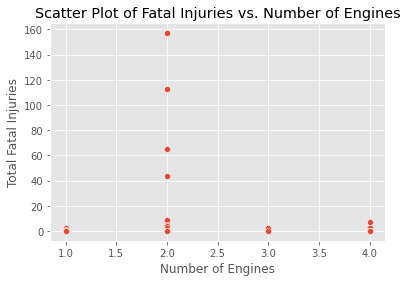

In [61]:
# Scatter plot of 'total_fatal_injuries' against 'number_of_engines'
sns.scatterplot(x='number_of_engines', y='total_fatal_injuries', data=df)

plt.xlabel('Number of Engines')
plt.ylabel('Total Fatal Injuries')
plt.title('Scatter Plot of Fatal Injuries vs. Number of Engines')
plt.show()

This scatter plot shows us how the number of engines on an aircraft is related to the total number of fatal injuries in accidents. On the bottom, we have the number of engines. Up the left, we have the number of fatal injuries. Each dot stands for a different accident involving an aircraft with that many engines. We can see that most of the dots are near the bottom, which means there weren't many fatal injuries in those accidents. There are a few dots higher up, showing that sometimes accidents with more engines have more fatal injuries, but these don't happen as often. Listing the models shown in this plot will further assist in finding potential Airplanes for purchase. 

In [62]:
from scipy.stats import pearsonr

# Calculating Pearson's correlation coefficient
corr_coefficient, p_value = pearsonr(df['total_minor_injuries'].dropna(), df['total_serious_injuries'].dropna())

print(f"Pearson's Correlation Coefficient: {corr_coefficient}, P-value: {p_value}")

Pearson's Correlation Coefficient: 0.5654630769449023, P-value: 1.6807102743382414e-74


Pearson's correlation coefficient provides us with a measure of the strength and direction of the association between two variables. In this analysis, the coefficient value of approximately 0.57 suggests a moderate positive correlation between the number of minor injuries and serious injuries reported in aviation incidents. This implies that as the number of minor injuries increases, the number of serious injuries tends to increase as well.

Furthermore, the P-value obtained in this analysis is extremely low, significantly below the standard threshold of 0.05. This indicates a very high statistical significance, allowing us to confidently say that the observed correlation is not due to randomness in the data. Therefore, we can consider the relationship between minor and serious injuries in our dataset to be both meaningful and reliable.

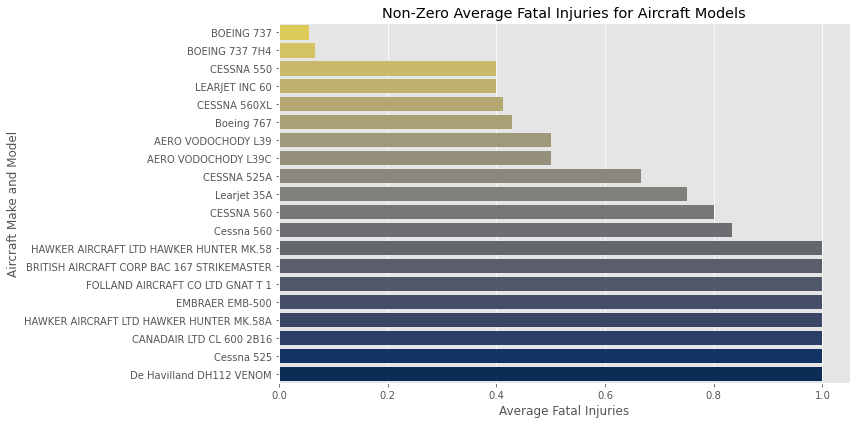

In [63]:
df['make_model'] = df['make'] + " " + df['model']

# Filtering out the make and models with zero average fatal injuries
non_zero_avg_fatal = df.groupby('make_model')['total_fatal_injuries'].mean().reset_index()
non_zero_avg_fatal = non_zero_avg_fatal[non_zero_avg_fatal['total_fatal_injuries'] > 0]

non_zero_avg_fatal_sorted = non_zero_avg_fatal.sort_values('total_fatal_injuries', ascending=True)

palette = sns.color_palette("cividis_r", len(non_zero_avg_fatal_sorted.head(20)))

plt.figure(figsize=(12, 6))
sns.barplot(
    x='total_fatal_injuries', 
    y='make_model', 
    data=non_zero_avg_fatal_sorted.head(20),
    palette=palette
)
plt.title('Non-Zero Average Fatal Injuries for Aircraft Models')
plt.xlabel('Average Fatal Injuries')
plt.ylabel('Aircraft Make and Model')
plt.tight_layout()
plt.show()


This bar chart provides a comparative analysis of various aircraft models based on the average number of fatal injuries. It assesses the historical safety performance of these aircraft. Notably, we see that models like the Boeing 737 and the Cessna 560 appear at the lower end of the scale, showing a lower average of fatal injuries. This suggests a favorable safety record, which is significant given the high utilization rate of these aircraft in commercial aviation.

We also encounter models such as the Aero Vodochody L39 and Learjet 35A, which continue the trend of lower average fatal injuries. 

Although this bar chart is much larger than the first 20 models we see above, with the business problem in mind, I believe only looking at the top 20 in this comparative analysis is a logical choice and will yield the best results. 

In [64]:
print(non_zero_avg_fatal_sorted)

                                     make_model  total_fatal_injuries
87                                   BOEING 737              0.055556
95                               BOEING 737 7H4              0.066667
259                                  CESSNA 550              0.400000
418                              LEARJET INC 60              0.400000
262                                CESSNA 560XL              0.411765
222                                  Boeing 767              0.428571
4                            AERO VODOCHODY L39              0.500000
5                           AERO VODOCHODY L39C              0.500000
256                                 CESSNA 525A              0.666667
423                                 Learjet 35A              0.750000
261                                  CESSNA 560              0.800000
283                                  Cessna 560              0.833333
390     HAWKER AIRCRAFT LTD HAWKER HUNTER MK.58              1.000000
198  BRITISH AIRCRAF

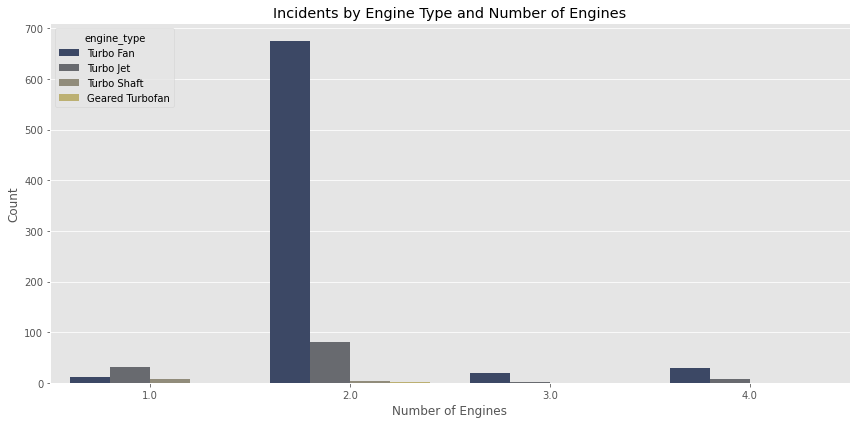

In [65]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='number_of_engines', hue='engine_type', palette='cividis')
plt.title('Incidents by Engine Type and Number of Engines')
plt.xlabel('Number of Engines')
plt.ylabel('Count')
plt.tight_layout()


This bar chart is showing us the number of incidents that have occurred per engine type and engine count. The data shows a substantial concentration of aircraft equipped with two engines. Within this category, Turbo Fan technology is the most prevalent, indicating it is the standard engine type for dual-engine aircraft in our operational context. This engine type combined with 2.0 engines is commonly seen on commercial models made by Boeing and Airbus. It is also common on most private aircraft in our cleaned dataset. Although this visualization provides useful insight into the number of incidents to engine type and the most common number of engines, we must consider that most commercials in our dataset are built with a standard 2.0 turbofan engine platform. Aircraft with 3.0 and 4.0 engines are usually aircraft utilized for a special purpose (Farming, military, and cargo aircraft). 

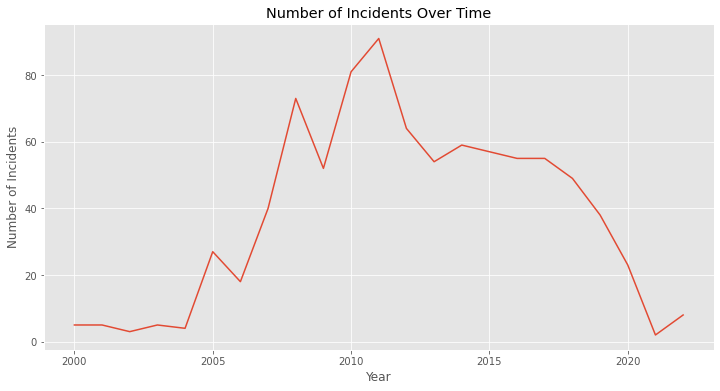

In [66]:
incidents_per_year = df.groupby(df['event_date'].dt.year).size()

# Plot
plt.figure(figsize=(12, 6))
incidents_per_year.plot(kind='line')
plt.title('Number of Incidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.show()


In [67]:
incident_count = df.groupby('make_model').size().reset_index(name='incident_count')
incident_count_sorted = incident_count.sort_values('incident_count', ascending=True)

incident_count.head(40)


make_model  incident_count
0         AERO VODOCHODY L 39               1
1        AERO VODOCHODY L 39C               1
2         AERO VODOCHODY L-29               1
3         AERO VODOCHODY L-39               1
4          AERO VODOCHODY L39               2
5         AERO VODOCHODY L39C               4
6   AEROVODOCHODY L 29 DELFIN               1
7   AEROVODOCHODY L-29 DELFIN               2
8      AIR TRACTOR INC AT 802               1
9                  AIRBUS 320               2
10                 AIRBUS 321               1
11                 AIRBUS 330               1
12                AIRBUS A220               2
13      AIRBUS A300 - F4 622R               1
14          AIRBUS A300B4-203               1
15                AIRBUS A319               3
16            AIRBUS A319 112               1
17            AIRBUS A319 114               1
18            AIRBUS A319 115               1
19            AIRBUS A319 132               2
20            AIRBUS A319-111               1
21            AIRBUS A319-112               1
22                AIRBUS A320               7
23          AIRBUS A320 - 211               1
24          AIRBUS A320 - 214               1
25          AIRBUS A320 - 231               1
26            AIRBUS A320 232               3
27            AIRBUS A320 233               1
28            AIRBUS A320-232               3
29                AIRBUS A321               5
30            AIRBUS A321 231               6
31           AIRBUS A321-271N               1
32                AIRBUS A330               4
33          AIRBUS A330 - 301               1
34          AIRBUS A330 - 323               1
35            AIRBUS A330 223               1
36            AIRBUS A330 323               3
37            AIRBUS A330-323               2
38          AIRBUS A340 - 300               1
39                AIRBUS A380               1

When analyzing the incident count per make and model, Excluding the single person and two person Aero Vodochody jets, we can see that various Airbus models in our dataset have very low incident count. This is pleasing news considering that Airbus is a very common Manufacture in the commercial flight industry. 

In [68]:
engine_reliability = df.groupby(['engine_type', 'make_model']).size().reset_index(name='incident_count')
engine_reliability_sorted = engine_reliability.sort_values('incident_count', ascending=True)

engine_reliability.head(25)

engine_type              make_model  incident_count
0   Geared Turbofan             AIRBUS A220               1
1         Turbo Fan    AERO VODOCHODY L 39C               1
2         Turbo Fan     AERO VODOCHODY L-39               1
3         Turbo Fan      AERO VODOCHODY L39               2
4         Turbo Fan     AERO VODOCHODY L39C               1
5         Turbo Fan  AIR TRACTOR INC AT 802               1
6         Turbo Fan              AIRBUS 320               2
7         Turbo Fan              AIRBUS 321               1
8         Turbo Fan              AIRBUS 330               1
9         Turbo Fan             AIRBUS A220               1
10        Turbo Fan   AIRBUS A300 - F4 622R               1
11        Turbo Fan       AIRBUS A300B4-203               1
12        Turbo Fan             AIRBUS A319               3
13        Turbo Fan         AIRBUS A319 112               1
14        Turbo Fan         AIRBUS A319 114               1
15        Turbo Fan         AIRBUS A319 115               1
16        Turbo Fan         AIRBUS A319 132               2
17        Turbo Fan         AIRBUS A319-111               1
18        Turbo Fan         AIRBUS A319-112               1
19        Turbo Fan             AIRBUS A320               7
20        Turbo Fan       AIRBUS A320 - 211               1
21        Turbo Fan       AIRBUS A320 - 214               1
22        Turbo Fan       AIRBUS A320 - 231               1
23        Turbo Fan         AIRBUS A320 232               3
24        Turbo Fan         AIRBUS A320 233               1

We can see the same for Airbus models when analyzing the reliability of engine type based on the data in our dataset. 

## Evaluation
Following a comprehensive process of data preparation, cleaning, and analytical modeling, I have three business recommendations to suggest. The analysis has distilled a list of prospective aircraft, each with the potential to serve effectively in commercial and private aviation enterprises. The manufacturers represented in the findings are renowned for their commitment to safety and reliability. The highlighted models are designed to accommodate a range of passenger capacities and are capable of traversing medium to long-haul routes efficiently.

Implementing this model into the business's decision-making process is anticipated to yield positive outcomes. The actionable insights derived from the analysis promise to enhance the strategic selection of aircraft, optimizing the balance between capacity, range, and safety. Nonetheless, it is essential to integrate these findings with a comprehensive risk assessment and to consider them as part of a broader decision framework that includes economic, technical, and regulatory factors.
***

### Conclusions
Through meticulous data preparation, cleansing, and analytical modeling, we have distilled a set of actionable insights and robust aircraft model recommendations tailored to the needs of the business. Our analysis has resulted in several potential models that align with both commercial and private operational requirements, emphasizing safety, reliability, and operational efficiency.
***
### Recommendations

Based on the findings of our analysis, it is recommended that the business:

Prioritize aircraft models with the lowest historical average of fatal injuries, as these suggest a better safety record.
Consider the operational context of aircraft usage, including the frequency of flights and the environments in which the aircraft operate, to make informed decisions beyond the data presented.
Factor in the technological advancements and safety features of newer models, which may not be fully reflected in historical data.
***
### Limitations

While the analysis provides a data-driven foundation for decision-making, several limitations must be acknowledged:

Historical data may not account for recent improvements in aircraft design and technology that enhance safety.
The analysis might not fully capture the operational diversity of aircraft usage, which can significantly impact safety outcomes.
External factors such as regulatory changes and maintenance practices, which play a crucial role in aircraft safety, have not been extensively analyzed.
***
### Future Improvements

To further refine the recommendations for this business problem and create an up-to-date analysis, the following steps could be utilized in the future:

Incorporate real-time data tracking to capture the latest trends and improvements in aircraft safety and performance.
Expand the scope of analysis to include a broader range of safety and performance metrics, offering a more comprehensive view of each aircraft model's operational profile.

In essence, while the analysis conducted provides a solid foundation for informed decision-making, it is crucial to approach the recommendations with an understanding of their inherent constraints and the dynamic nature of aviation safety. Continuous improvement in data collection, analysis techniques, and the incorporation of real-time operational data will significantly enhance the robustness of future recommendations.

It is also important to consider that due to the state and quantity of the data provided in the original dataset when choosing Airplane models, the possibility of a new version of the specific model should be considered. This can be resolved when communicating with sales representatives of the manufacture you choose for each industry. 
